In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pi = np.pi
cos = np.cos
sin = np.sin
sqrt = np.sqrt
h = 6.626e-34   #planck in J/Hz
phi0 = 2.067e-15   #Fluxquantum in Vs
e0 = 8.854e-12   #epsilon0 in As/Vm
mu0 = 1.257e-6   #µ0 in H/m
kB = 1.38e-23   #boltzmann cons. in J/K

In [3]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1b85b8','#ae5a41','#559e83','#c3cb71','#fb9062'])


## 1.2.4 (Noise)

In [4]:
#epsilon estimate
T = 100e-3   #mK
C = 3e-12   #pF
Ls = 100e-12   #pH
Ic = 1e-6   #µA
Rs = 10  #Ohm

def betaC(Ic,C,Rs):
    return 2*Ic*pi*C*Rs**2/phi0

def epsilon(T,C,Ls,Rs):
    return 16*kB*T*sqrt(Ls*C/betaC(Ic,C,Rs))/h

epsilon(T,C,Ls,Rs), betaC(Ic,C,Rs)

(0.6044048513949449, 0.9119282013323058)

## 2.2.1 (Amplifier noise)

In [5]:
Sphi_s = (1e-6)**2   #muPhi0**2/hz
Sv = (0.33e-9)**2
Si = (2.6e-12)**2
Vphi = 600e-6
Iphi = 12e-6

def singlestage_noise():
    return sqrt(Sv/Vphi**2/16**2 + Si/Iphi**2/16**2)

singlestage_noise(), sqrt(Sv)/(16*80e-6)

(3.6946141356183754e-08, 2.5781249999999997e-07)

## 2.2.2 (Amplifier noise - 2stage)

In [6]:
Gphi = pi
def twostage_rta_noise():
    return sqrt(Sv/Vphi**2/Gphi**2/18**2 + Si/Iphi**2/Gphi**2)
twostage_rta_noise(), sqrt(Sv/Vphi**2/Gphi**2/16**2), sqrt(Si/Iphi**2/Gphi**2)

(6.964958281698117e-08, 1.0941902337567805e-08, 6.896714200648797e-08)

## 2.3 (Flux-to-Flux transter maximization)

In [7]:
Lm = 13.3e-9
Lpar = 0.5e-9
Ls = 103e-12
kis = 0.7
def Li_theo(n):
    return 1.64e-9*n**2
#Li=160e-9

def ftf(Li):
    return kis*sqrt(Ls*Li)/(Lm+2*(Li+Lpar))

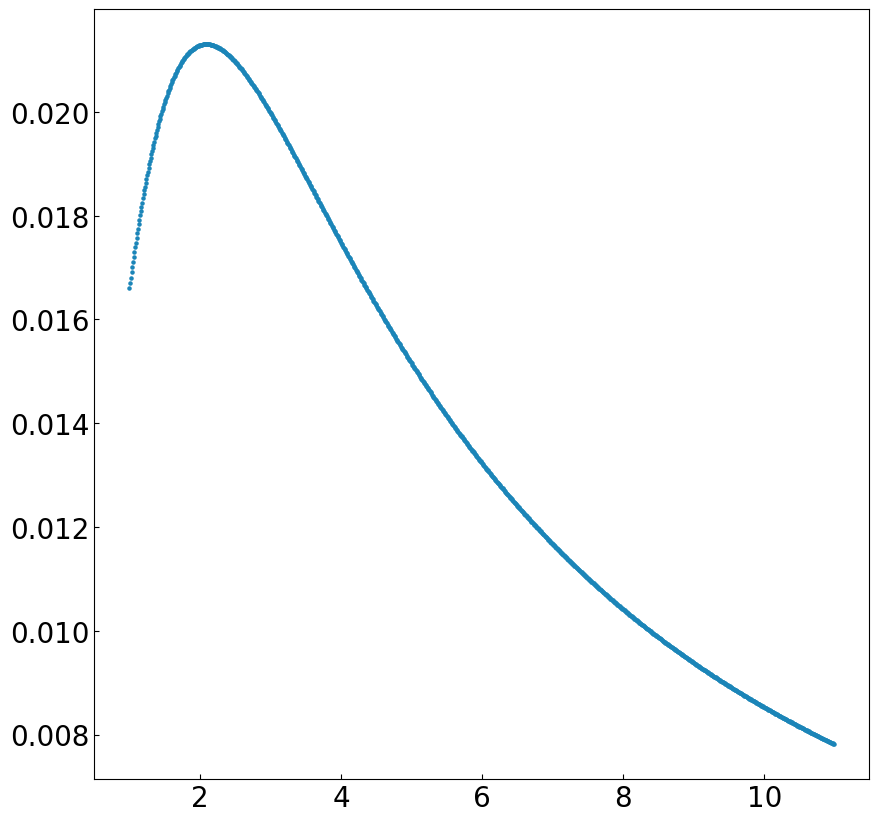

In [8]:
n=np.arange(1,11,0.01)
plt.scatter(n,ftf(Li_theo(n)), s=5)

#plot for results chapter?

In [9]:
n[np.argmax(ftf(Li_theo(n)))]

2.0900000000000007

In [10]:
#with measured Li from fabienne
1.27*4

5.08

In [11]:
#preliminary Mis
(3.3e-6/2.067e-15)**-1

6.263636363636362e-10

In [12]:
#needs to be updated with measured values
626e-12/sqrt(6.57e-9*120e-12)

0.7050193314634637

In [13]:
626e-12/(2*(0.5e-9+6.65e-9+6.57e-9))

0.0228134110787172

In [14]:
2.28/1.95

1.169230769230769

In [15]:
328e-12/(2*(0.5e-9+6.65e-9+1.27e-9))

0.019477434679334917

## 3.1 (Flux-to-transfer + extr. energy sens. [theo]) 

In [16]:
phi0 = 2.0678e-15
kb = 1.38e-23 
h = 6.626e-34
T = 20e-3
Ic = 6e-6
C = 0.95e-12
Ls = 147e-12
Lpar = 0.5e-9
Lm = 13.3e-9
Lp = Lm/2
Li_opt = Lp+Lpar
kis = 0.75
sin = Li_opt/(Li_opt + Lpar + Lp)

def betaL(Ls):
    return 2*Ic*Ls/phi0

def betaC(Rs):
    return 2*np.pi*Ic*Rs**2*C/phi0

def ep(Rs,Ls):
    return kb*T*np.sqrt(betaL(Ls)*phi0*C/(2*Ic))*np.sqrt(np.pi*betaL(Ls)/betaC(Rs))*((1-kis**2*sin)**2+np.sqrt(2)*(1+betaL(Ls))**2/betaL(Ls)**2)*(2*Lpar+Lm)/(kis**2*sin**2*Lm)

print(f'theo. obtainable energy sens.:  {ep(6.3,147e-12)/h:.3}' + 'h')
print(f'theo. obtainable deltaS/deltaP corresponnding to single Lp: {2*ftf(Li_opt)*100:.3}' + '%')
print(f'theo. obtainable deltaS/delta corresponnding to parallel meander Lp: {ftf(Li_opt)*100:.3}' + '%')

theo. obtainable energy sens.:  0.534h
theo. obtainable deltaS/deltaP corresponnding to single Lp: 5.38%
theo. obtainable deltaS/delta corresponnding to parallel meander Lp: 2.69%


In [17]:
Li_opt

7.15e-09

In [18]:
Li_theo(2.09)

7.163683999999998e-09

In [19]:
#Energieausflösung detektor???

In [20]:
betaC(6)

0.6235175669954788

In [21]:
Mis_theo_max = kis*sqrt(Li_opt*Ls)

## 3.1 (Critical B-Field)

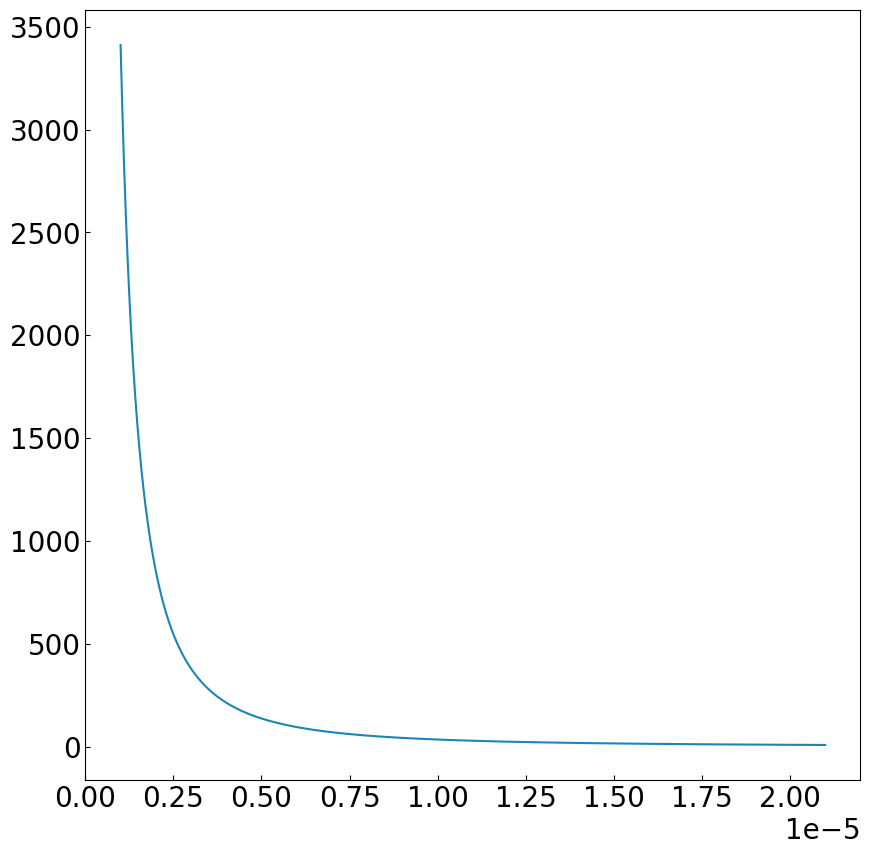

In [22]:
def Bcrit(w):
    return 1.65*phi0/w**2
w = np.linspace(1,21,2000)*1e-6
plt.plot(w,Bcrit(w)*1e6)

In [23]:
def wi(B):
    return sqrt(1.65*phi0/B)
wi(65e-6)

7.245019509449764e-06

In [24]:
1/(11.8*1e4)

8.47457627118644e-06

In [25]:
4*26/2.4


43.333333333333336

## 4.1 

In [26]:
#Ic (Ib)
ic_med=5.84
def ic(ib,T):
    return ib/2 + kB*T/phi0*(1+sqrt(1+ib*phi0/(kB*T)))

ic(11.615,0.15), 11.615/2
#this or median of all 10 Ic's?    

(5.807607831226785, 5.8075)

In [27]:
jc=ic_med*1e-6/(4.5e-6)**2
jc/1e4  #in A/cm**2


28.839506172839506

In [28]:
#ic and jc deviations
(6-5.84)/6, (29.6296-28.84)/29.6296

(0.02666666666666669, 0.02664902664902665)

In [60]:
#ic deviations from median
(5.84-5.19)/5.84, (6.29-5.84)/5.84

(0.11130136986301362, 0.07705479452054798)

In [63]:
4.5e-6**2

2.025e-11

In [61]:
#deltai deviations from median
(7.185-6.09)/7.185, (7.73-7.185)/7.185

(0.15240083507306887, 0.0758524704244956)

(1.0, 0.1964117234610169)

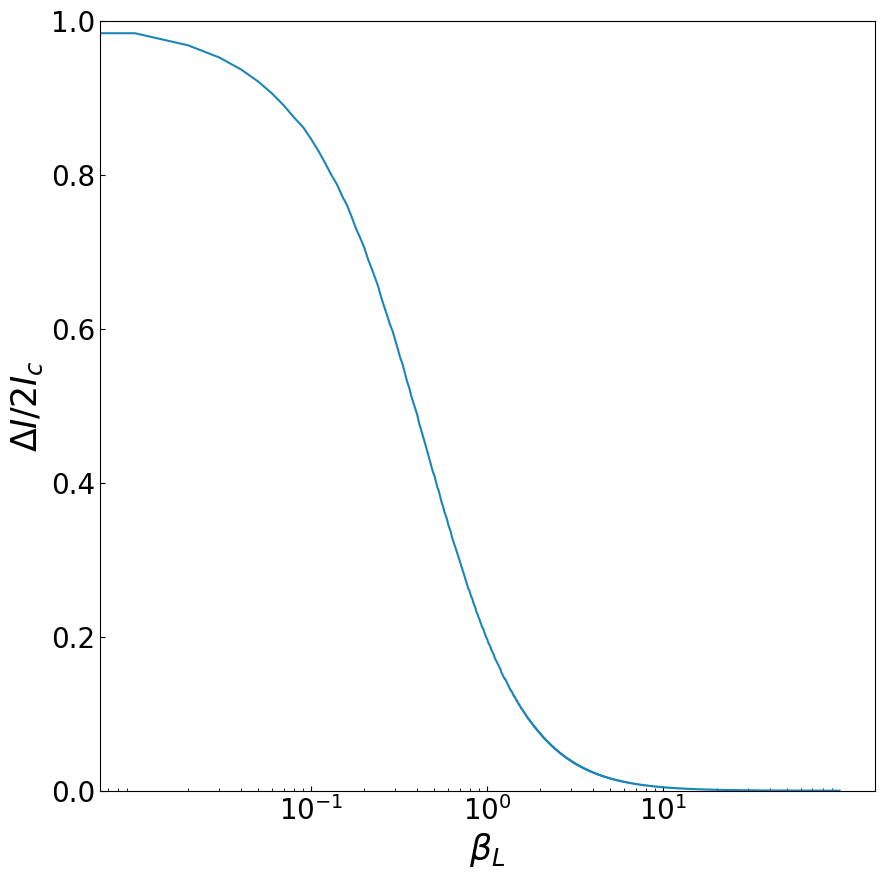

In [29]:
# betaL
# y-werte zu niedrig, vermutlich da formeln nur für grenzwerte und nicht allgemein gelten

Ic=5.84e-6
phi = np.linspace(0,1,1001)*2.067e-15

def PhiExt(x,betaL):
        return x + phi0*betaL*np.sin(np.pi*x/phi0)/2  #verhältnis von phi und phi_ext, abhängig von betaL

#erhalte index für phi wert, für den phi_ext/phi0=0.5
phi_index=np.argmin(np.abs(PhiExt(phi,4)/phi0-1/2))   

betas=np.linspace(0,100,10001)    #betaL von 0 bis 2

def Ism(phi):
    return 2*Ic*abs(np.cos(pi*phi/phi0))      #maixmaler suprastrom

phi_arr = np.array([])

for b in betas:
    phi_index=np.argmin(np.abs(PhiExt(phi,b)/phi0-1/2))   #siehe oben
    phi_arr = np.append(phi_arr,phi[phi_index])

deltaI=2*Ic-Ism(phi_arr)
def mod(delta):
    return deltaI/(2*Ic)
plt.plot(betas,mod(deltaI))
plt.ylim(0,1)
plt.ylabel(r'$\Delta I / 2I_c$')
plt.xlabel(r'$\beta_L$')
plt.rcParams['figure.figsize'] = [5, 5]
plt.xscale('log')
plt.xticks([1e-1,1e0,1e1])
plt.show

betas[100], mod(deltaI)[100]

In [30]:
# betaL from Tesche

deltaI = 7.185   #median
deltaImin = 6.09   #min meas
deltaImax = 7.73  #max meas
deltaIi2mean = (7.05+6.74)/2   #mean fabienne (2ch)
deltaIi2max = 7.05   #max fabienne
deltaIi2min = 6.74   #min fabienne
betaL = np.array([0.6,0.85,0.52,0.82,0.80,0.87])   #corresponding to same order as deltaI's above


In [47]:
# array flux
Mix = 1/11.7
deltaPhi = deltaI*Mix 
deltaPhi

0.614102564102564

In [32]:
# Ls
Ic = 5.84e-6
Ici2 = 6.52e-6
def Ls_meas(beta,Ic):
    return beta*phi0/(2*Ic)
Ls_meas(betaL[3],Ici2)*1e12

130.0303680981595

In [33]:
(130-103)/130

0.2076923076923077

In [34]:
#Cjj

C_inmuFpercm2=1/(0.132-0.053*np.log10(jc/1e7))
C_meas=C_inmuFpercm2*1e4*(4.5e-6)**2*1e-6
C_meas

9.47942084277909e-13

In [35]:
#betaC

def betaC_meas(R,C):
    return 2*ic_med*1e-6*R**2*pi*C/phi0
betaC_meas(6,C_meas)

0.6055757693899747

In [36]:
#Mfs, Mis

Mfs=phi0/40.59e-6
Mis=phi0/3.3e-6

Mfs,Mis

(5.094358216309436e-11, 6.266060606060607e-10)

In [37]:
#Li meas

lstr_para_int = 454+185+85
lstr_para = 492+68+60

def Lstrip(l,g,w):   #aus Diss D.H p.45
    return mu0*l*g/w

Lstr = 0.17e-12 # Lstr aus Cla04 in nH/µm für 375nm SiO2 und lambda=90 nm

Lstrip(1e-6,375e-9,3e-6), lstr_para, lstr_para_int

(1.57125e-13, 620, 724)

In [38]:
Lstrip(1e-6,375e-9,3e-6)*lstr_para, Lstrip(1e-6,375e-9,3e-6)*lstr_para_int

(9.74175e-11, 1.137585e-10)

In [39]:
Lstr*lstr_para, Lstr*lstr_para_int   #Werte für thesis, da Lstr aus Cla04 verwendet wird

(1.054e-10, 1.2308e-10)

In [40]:
Lstrip(1.72e-3,375e-9,3e-6)

2.70255e-10

In [45]:
Li_loop=(1.27e-9-0.17e-12*1.72e3)/4
Li_tot_new=16*Li_loop+Lstr*3.44e3      # Nur wenn washer ohren gleich groß geblieben wären
Li_tot_new                             # impliziert, dass 0.5nH pro schleife dazukamen, erscheint sehr hoch!

4.4952e-09

In [46]:
(6.56-6.45)/6.56, (6.56-6.36)/6.56   #abweichungen in % zu Li_theo, nicht relevant für thesis

(0.016768292682926744, 0.030487804878048672)

In [56]:
#kis 
Mis_meas = phi0/3.385e-6
Li_meas = 6.4e-9
Ls_meas = 103e-12
kis_meas = Mis_meas/np.sqrt(Li_meas*Ls_meas)
kis_meas

0.7523869576765604

In [57]:
Mis_meas, phi0

(6.108714918759232e-10, 2.0678e-15)